# Using DLS method to analyse rotation data

In [1]:
# import necassary functions
from tools.dls import *

## Read Data

In [23]:
%%time
data_df = quick_read(8)
data_na = data_df.values

CPU times: user 20.6 s, sys: 1.58 s, total: 22.2 s
Wall time: 21.2 s


# Perform DLS1
Use data read just above and a specified number for the subset rotation to demodulate.

In [3]:
%%time
subset_rot = 5000
params_df = DLS1(data_na, subset_rot)

CPU times: user 9min 44s, sys: 192 ms, total: 9min 44s
Wall time: 9min 42s


100% |########################################################################|


## Visualizing parameters
Parameters are stored in *params_df* structured like this:  

| index |              beta              |                     sigma                     |   time  |    Nsamples    |
|-------|--------------------------------|-----------------------------------------------|---------|----------------|
|  ...  |           ...                  |                   ...                         |   ...   |      ...       |
|  433  |  [$\beta_{0}$...$\beta_{4}$]   |  [$\sigma(\beta_{0})$...$\sigma(\beta_{4})$]  |  $t_m$  |  $N_{sample}$  |
|  ...  |           ...                  |                   ...                         |   ...   |      ...       |

Steps:
1. visualize the average time ($t_m$ vs. index).
2. visualize the re-sample process ($N_{sample}$ vs. $t_m$ ).
3. visualize offset $\beta_0$ with uncertainty, $\sigma(\beta_0)$ ($\beta_0$ vs. $t_m$).
4. visualize each frequency component $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$ with corresponding uncertainty. ($\beta_i$ vs. $t_m$)



### 1. Visualize $t_m$

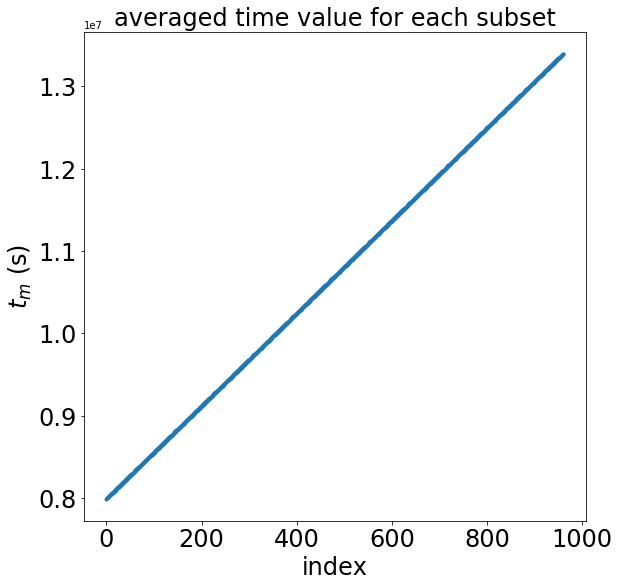

In [4]:
# obtain t_m and index from params_df
t_m = select_param(params_df, 'time')  
index = params_df.index.values

# plotting t_m against index
f, ax = plt.subplots(figsize=(9,9))
ax.plot(index, t_m, '.')
ax.set_xlabel('index', fontsize=24)
ax.set_ylabel('$t_m$ (s)', fontsize=24)
ax.set_title('averaged time value for each subset', fontsize=24)
ax.tick_params(labelsize=24)
plt.show()

### 2. Visualize $N_{sample}$

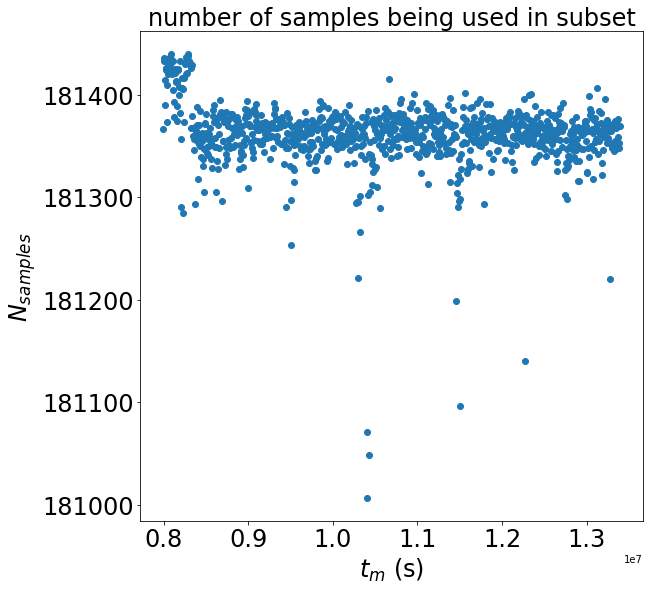

In [5]:
# obtain N_sample from params_df
Nsamples = select_param(params_df, 'Nsamples')  

# plotting Nsamples against t_m
f, ax = plt.subplots(figsize=(9,9))
ax.plot(t_m, Nsamples, 'o')
ax.set_xlabel('$t_m$ (s)', fontsize=24)
ax.set_ylabel('$N_{samples}$', fontsize=24)
ax.set_title('number of samples being used in subset', fontsize='24')
ax.tick_params(labelsize=24)
plt.show()

### 3. Visualize $\beta$
#### calculate $\beta$

In [6]:
beta = select_param(params_df, 'beta')  # beta vector
sigma_beta = select_param(params_df, 'sigma')  # sigma vector

# create beta variables
beta_0 = beta[:,0]
beta_1 = beta[:,1]
beta_2 = beta[:,2]
beta_3 = beta[:,3]
beta_4 = beta[:,4]

# creat sigma_beta variables
sigma_beta_0 = sigma_beta[:,0]
sigma_beta_1 = sigma_beta[:,1]
sigma_beta_2 = sigma_beta[:,2]
sigma_beta_3 = sigma_beta[:,3]
sigma_beta_4 = sigma_beta[:,4]

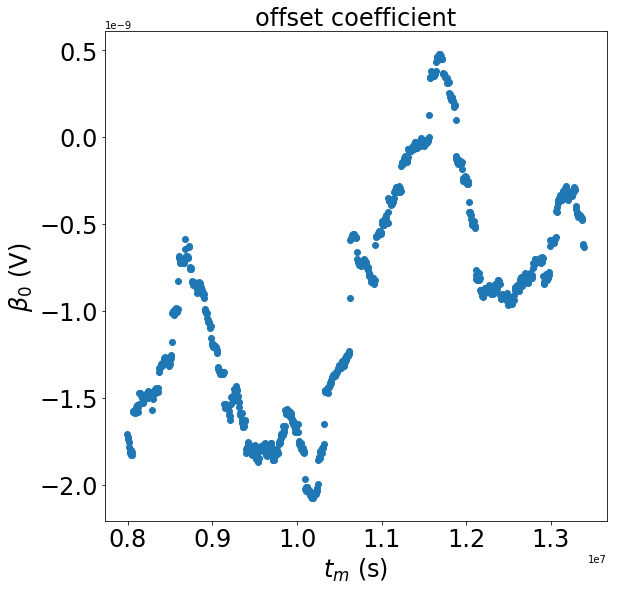

In [7]:
# plotting beta_0 against t_m
f, ax = plt.subplots(figsize=(9,9))
ax.errorbar(t_m, beta_0, fmt='o', yerr=sigma_beta_0, ecolor='g')  # error too small to be visible
ax.set_xlabel('$t_m$ (s)', fontsize=24)
ax.set_ylabel(r'$\beta_0$ (V)', fontsize=24)
ax.set_title('offset coefficient', fontsize=24)
ax.tick_params(labelsize=24)
plt.show()

#### Visualize $\beta_1$ and $\beta_2$

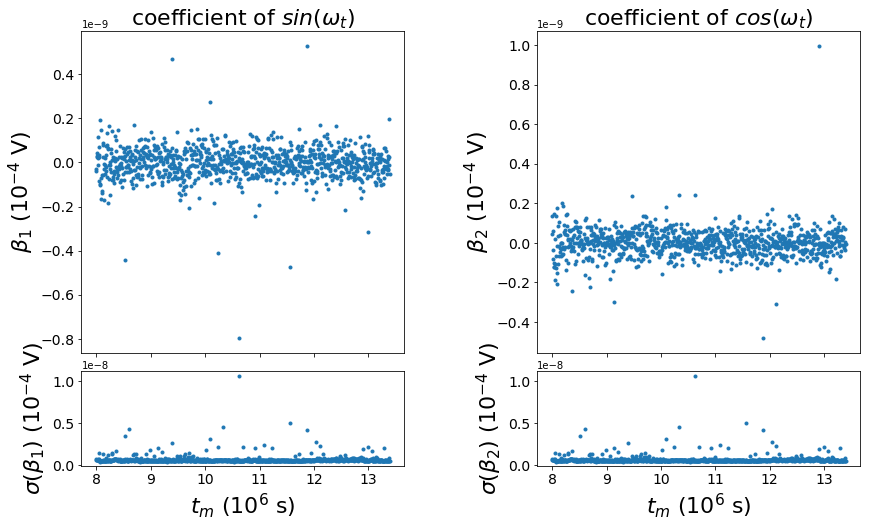

In [8]:
fig = plt.figure(figsize= (16,8))
ax1 = plt.subplot2grid((4, 8), (0, 0), colspan=3, rowspan=3)
ax2 = plt.subplot2grid((4, 8), (0, 4), colspan=3, rowspan=3)
ax3 = plt.subplot2grid((4, 8), (3, 0), colspan=3)
ax4 = plt.subplot2grid((4, 8), (3, 4), colspan=3)

# f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15,15), sharex=True)  # creating the figure object


# generating each subplot
ax1.plot(t_m * 1e-6, beta_1 * 1e4, '.')  
ax1.set_ylabel(r'$\beta_1$ ($10^{-4}$ V)', fontsize=22)
ax1.set_title('coefficient of $sin(\omega_t)$', fontsize=22)
ax1.tick_params(labelsize=14)
ax1.set_xticklabels([])

ax2.plot(t_m * 1e-6, beta_2 * 1e4, '.')
ax2.set_ylabel(r'$\beta_2$ ($10^{-4}$ V)', fontsize=22)
ax2.set_title('coefficient of $cos(\omega_t)$', fontsize=22)
ax2.tick_params(labelsize=14)
ax2.set_xticklabels([])

ax3.plot(t_m * 1e-6, sigma_beta_1 * 1e4, '.')  
ax3.set_xlabel('$t_m$ ($10^6$ s)', fontsize=22)
ax3.set_ylabel(r'$\sigma(\beta_1)$ ($10^{-4}$ V)', fontsize=22)
ax3.tick_params(labelsize=14)

ax4.plot(t_m * 1e-6, sigma_beta_2 * 1e4, '.')
ax4.set_xlabel('$t_m$ ($10^6$ s)', fontsize=22)
ax4.set_ylabel(r'$\sigma(\beta_2)$ ($10^{-4}$ V)', fontsize=22)
ax4.tick_params(labelsize=14)


plt.show()

#### Visualize $\beta_3$ and $\beta_4$

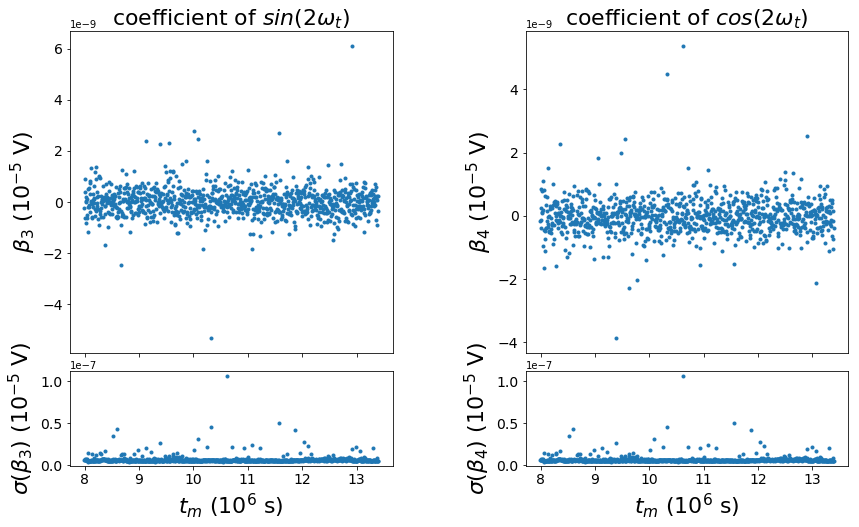

In [9]:
fig = plt.figure(figsize= (16,8))
ax1 = plt.subplot2grid((4, 8), (0, 0), colspan=3, rowspan=3)
ax2 = plt.subplot2grid((4, 8), (0, 4), colspan=3, rowspan=3)
ax3 = plt.subplot2grid((4, 8), (3, 0), colspan=3)
ax4 = plt.subplot2grid((4, 8), (3, 4), colspan=3)

# f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15,15), sharex=True)  # creating the figure object


# generating each subplot
ax1.plot(t_m * 1e-6, beta_3 * 1e5, '.')  
ax1.set_ylabel(r'$\beta_3$ ($10^{-5}$ V)', fontsize=22)
ax1.set_title('coefficient of $sin(2\omega_t)$', fontsize=22)
ax1.tick_params(labelsize=14)
ax1.set_xticklabels([])

ax2.plot(t_m * 1e-6, beta_4 * 1e5, '.')
ax2.set_ylabel(r'$\beta_4$ ($10^{-5}$ V)', fontsize=22)
ax2.set_title('coefficient of $cos(2\omega_t)$', fontsize=22)
ax2.tick_params(labelsize=14)
ax2.set_xticklabels([])

ax3.plot(t_m * 1e-6, sigma_beta_3 * 1e5, '.')  
ax3.set_xlabel('$t_m$ ($10^6$ s)', fontsize=22)
ax3.set_ylabel(r'$\sigma(\beta_3)$ ($10^{-5}$ V)', fontsize=22)
ax3.tick_params(labelsize=14)

ax4.plot(t_m * 1e-6, sigma_beta_4 * 1e5, '.')
ax4.set_xlabel('$t_m$ ($10^6$ s)', fontsize=22)
ax4.set_ylabel(r'$\sigma(\beta_4)$ ($10^{-5}$ V)', fontsize=22)
ax4.tick_params(labelsize=14)


plt.show()

### Writting parameters
write some parameters in .\Data\DLS1\ 

In [42]:
write_dict = {'time': t_m, 'beta_3': beta_3, 'beta_4': beta_4, 'sigma_3': sigma_beta_3, 'sigma_4': sigma_beta_4}
write_df = pd.DataFrame(write_dict)
write_df.to_csv('./Data/DLS1/DLS1_data.txt', index=False)


### DLS2: Calculate

In [43]:
w_s = 2 * np.pi / (23*3600 + 56*60 + 4)  # sidereal frequency
EMS_co_values, EMS_co_sigma = DLS2(params_df, w_s)  # output a list contains two dictionary (one for the value of each coefficient, one for std)

### Display SME coefficients

In [44]:
EMS_co_values_disp = {}
for key, value in EMS_co_values.items():
    EMS_co_values_disp[key] = str(round(value, 17))

EMS_co_sigma_disp = {}
for key, value in EMS_co_sigma.items():
    EMS_co_sigma_disp[key] = str(round(value, 17))

#### EMS coefficients
| EMS coefficient | result |
| :- | :- | :-|
| $c^T_Q$ | {{EMS_co_values_disp['c_T_Q']}}$\pm${{EMS_co_sigma_disp['c_T_Q']}}|
| $c^T_Y$ | {{EMS_co_values_disp['c_T_Y']}}$\pm${{EMS_co_sigma_disp['c_T_Y']}}|
| $c^T_X$ | {{EMS_co_values_disp['c_T_X']}}$\pm${{EMS_co_sigma_disp['c_T_X']}}|
| $c^T_Z$ | {{EMS_co_values_disp['c_T_Z']}}$\pm${{EMS_co_sigma_disp['c_T_Z']}}|
| $c^T_M$ | {{EMS_co_values_disp['c_T_M']}}$\pm${{EMS_co_sigma_disp['c_T_M']}}|
| $c^T_\_$ | {{EMS_co_values_disp['c_T_u']}}$\pm${{EMS_co_sigma_disp['c_T_u']}}| 
